# 2.2 React Agent

A ReAct Agent is a simplified way to call tools to an LLM call. There is no need to check if an execution is necessary. Although the process behind the scenes is the same as in 2.1 the lines of code is less.

In [1]:
from langchain_openai import AzureChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage
from typing import Literal
from langchain.tools import tool
from langgraph.prebuilt import create_react_agent

Define the model

In [2]:
llm = AzureChatOpenAI(model="gpt-4.1-mini")

Define the tool/action the LLM will have access to

In [3]:
@tool
def weather_tool(location: Literal["Chicago", "New York", "Los Angeles"]) -> str:
    """
    Get the current weather for a specified location.
    Args:
        location (str): The name of the city to get the weather for. 
                        Must be one of "Chicago", "New York", or "Los Angeles".
    Returns:
        str: A string describing the current weather in the specified location.
    """

    weather_data = {
        "New York": "Sunny, 25°C",
        "Los Angeles": "Cloudy, 22°C",
        "Chicago": "Rainy, 18°C"
    }
    return weather_data.get(location, "Weather data not available for this location.")

Create the agent - Linking the tools to the LLM

In [4]:
agent = create_react_agent(
    model=llm,
    tools=[weather_tool]
)

LangGraph has a feature to visualize the flow of the agents. Notice below chart the interaction between the agent (llm) and the tools

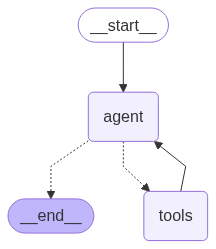

In [5]:
from IPython.display import Image
Image(agent.get_graph().draw_mermaid_png())

Set prompt

In [6]:
messages = [
    SystemMessage(
        content="You are a helpful assistant that can provide weather information for specific cities."
    ),
    HumanMessage(
        content="What is the weather like in NYC?"
    )
]

Call the agent

In [7]:
response = agent.invoke(
    input= {"messages": messages}
)

Print result

In [8]:
for message in response["messages"]:
    print(message.pretty_print())

================================ System Message ================================

You are a helpful assistant that can provide weather information for specific cities.
None
================================ Human Message =================================

What is the weather like in NYC?
None
================================== Ai Message ==================================
Tool Calls:
  weather_tool (call_egaimK43Z0LTf4lIOR1xy7IF)
 Call ID: call_egaimK43Z0LTf4lIOR1xy7IF
  Args:
    location: New York
None
================================= Tool Message =================================
Name: weather_tool

Sunny, 25°C
None
================================== Ai Message ==================================

The weather in New York City is currently sunny with a temperature of 25°C.
None
